In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

In [3]:
# PySQL 설치
! pip install PyMySQL
# PySQL 설치 오류시 다시 시도
! python3 -m pip install PyMySQL[rsa]
# 오류시 이 부분 추가!
! pip3 install crytography

     |████████████████████████████████| 43 kB 876 kB/s 
     |████████████████████████████████| 3.0 MB 5.3 MB/s 
ERROR: Could not find a version that satisfies the requirement crytography (from versions: 0.0.1, 1.0.0)
ERROR: No matching distribution found for crytography


In [4]:
import pymysql.cursors

In [5]:
# AWS를 통해 MySQL 데이터 접근
connection = pymysql.connect(host='13.125.200.44', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       #언어 설정 
                             cursorclass=pymysql.cursors.DictCursor #조회결과를 dictionary로 리턴
                             )

In [6]:
connection

In [7]:
cursor = connection.cursor()

In [8]:
cursor

### **1. 비덴트**

In [9]:
# 실행할 SQL
# 2019년 1월 1일 ~ 2019년 12월 31일 비덴트의 종가 조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '121800'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-12-31'
"""  

In [10]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

245

In [11]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [12]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('7246.000'),
  'DT': datetime.date(2019, 1, 2),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7191.000'),
  'DT': datetime.date(2019, 1, 3),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('6909.000'),
  'DT': datetime.date(2019, 1, 4),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('6800.000'),
  'DT': datetime.date(2019, 1, 7),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('6764.000'),
  'DT': datetime.date(2019, 1, 8),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7073.000'),
  'DT': datetime.date(2019, 1, 9),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7227.000'),
  'DT': datetime.date(2019, 1, 10),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7100.000'),
  'DT': datetime.date(2019, 1, 11),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7000.000'),
  'DT': datetime.date(2019, 1, 14),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7350.000'),
  'DT': datetime.date(2019, 1, 15),
  'STK_CD': '121800'},
 {'C_PRC': Decimal('7250.000'),
  'DT': datetime.date(2019, 1, 16),
  'STK_CD': '121800'},
 {'C_

In [13]:
# result를 데이터 프레임으로 변환
df = pd.DataFrame(result)

In [14]:
df

,STK_CD,DT,C_PRC
0,121800,2019-01-02,7246.000
1,121800,2019-01-03,7191.000
2,121800,2019-01-04,6909.000
3,121800,2019-01-07,6800.000
4,121800,2019-01-08,6764.000
...,...,...,...
240,121800,2019-12-23,7840.000
241,121800,2019-12-24,7730.000
242,121800,2019-12-26,7800.000
243,121800,2019-12-27,7990.000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  245 non-null    object
 1   DT      245 non-null    object
 2   C_PRC   245 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [16]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [17]:
# C_PRC 컬럼의 타입을 정수로 변환
df.loc[: , "C_PRC" ] = df.loc[: , "C_PRC" ].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  245 non-null    object        
 1   DT      245 non-null    datetime64[ns]
 2   C_PRC   245 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.9+ KB


In [19]:
df["C_PRC"].describe()

count      245.000000
mean      7707.632653
std       1690.240985
min       5620.000000
25%       6540.000000
50%       7140.000000
75%       8430.000000
max      15250.000000
Name: C_PRC, dtype: float64

In [20]:
# 종가 분산
df["C_PRC"].var()

2856914.585814653

In [21]:
# np.sqrt() : 루트 계산
# 분산에 루트를 계산하면 표준편차
# np.sqrt(df["C_PRC"].var())
# 분산에 0.5 승을 해도 표준편차
# df["C_PRC"].var() ** 0.5
# 다 같은 결과

# 종가의 표준편차
df["C_PRC"].std()

1690.2409845387886

In [22]:
df

,STK_CD,DT,C_PRC
0,121800,2019-01-02,7246
1,121800,2019-01-03,7191
2,121800,2019-01-04,6909
3,121800,2019-01-07,6800
4,121800,2019-01-08,6764
...,...,...,...
240,121800,2019-12-23,7840
241,121800,2019-12-24,7730
242,121800,2019-12-26,7800
243,121800,2019-12-27,7990


In [23]:
# 20일간의 종가 이동평균을 계산
df["MA20"] = df["C_PRC"].rolling(20).mean()
# 20일간의 종가 표준편차
df["stddev"] = df["C_PRC"].rolling(20).std()

# 상위 밴드(UpperB) / 하위 밴드(LowerB)
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

In [24]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB
0,121800,2019-01-02,7246,NaN,NaN,NaN,NaN
1,121800,2019-01-03,7191,NaN,NaN,NaN,NaN
2,121800,2019-01-04,6909,NaN,NaN,NaN,NaN
3,121800,2019-01-07,6800,NaN,NaN,NaN,NaN
4,121800,2019-01-08,6764,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
240,121800,2019-12-23,7840,8720.5,790.159711,10300.819421,7140.180579
241,121800,2019-12-24,7730,8582.0,699.380177,9980.760353,7183.239647
242,121800,2019-12-26,7800,8459.5,599.240528,9657.981056,7261.018944
243,121800,2019-12-27,7990,8344.0,422.329380,9188.658760,7499.341240


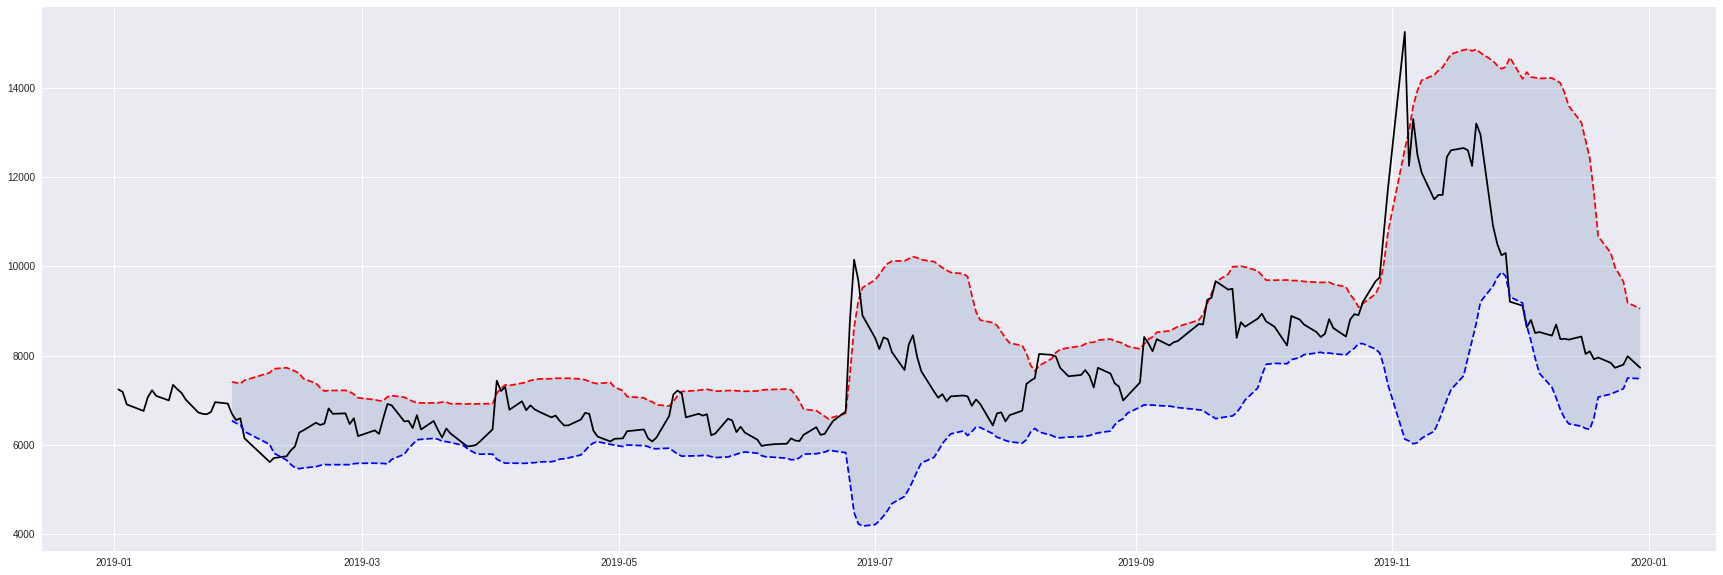

In [25]:
# pyplot을 통한 볼린저밴드를 시각화

# 그래프의 크기 가로 30 세로 10
plt.figure(figsize=(30, 10))
# 상위 밴드 : 빨간색
plt.plot(df.DT, df.UpperB, "r--")
# 종가의 이동평균 : 검은색
plt.plot(df.DT, df.C_PRC, "k")
# 하위 밴드 : 파란색
plt.plot(df.DT, df.LowerB, "b--")

# 각 날짜의 상위 밴드와 하위 밴드 사이에 색을 칠함
plt.fill_between(df.DT, df.LowerB, df.UpperB, alpha=0.2)

In [26]:
# PercentB : (종가 - 하위밴드) / (상위밴드 - 하위밴드)
df["PercentB"] = (df["C_PRC"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])
df['UB'] = 1.0
df['LB'] = 0.0

In [27]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB,PercentB,UB,LB
0,121800,2019-01-02,7246,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,121800,2019-01-03,7191,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,121800,2019-01-04,6909,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,121800,2019-01-07,6800,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,121800,2019-01-08,6764,NaN,NaN,NaN,NaN,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
240,121800,2019-12-23,7840,8720.5,790.159711,10300.819421,7140.180579,0.221417,1.0,0.0
241,121800,2019-12-24,7730,8582.0,699.380177,9980.760353,7183.239647,0.195445,1.0,0.0
242,121800,2019-12-26,7800,8459.5,599.240528,9657.981056,7261.018944,0.224860,1.0,0.0
243,121800,2019-12-27,7990,8344.0,422.329380,9188.658760,7499.341240,0.290448,1.0,0.0


In [28]:
# 매수일 계산
def TimeToBuy(e):
  timing = 0
  if e['PercentB'] < 0:
    timing = 1
  return timing

In [29]:
df['time_to_buy'] = df[['PercentB']].apply(TimeToBuy, axis=1)

In [30]:
pd.set_option('display.max_rows', None)

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df['first_crashed'] = df['time_to_buy'].apply('diff')

In [33]:
idx = 0
idx_ls = []
fs_np = np.array(df['first_crashed'])

idx = np.where(fs_np == 1.0)
idx_ls.append(idx[0]+1)

In [34]:
idx

(array([ 22, 224]),)

In [35]:
idx_ls

[array([ 23, 225])]

In [36]:
purchase_date = []
for idx in idx_ls:
  purchase_date.append(df.iloc[idx]['DT'])

In [37]:
# 매수일 리스트
purchase_date
# 이후에 상세 그래프와 비교한다
# 그리하여, 이중에서 이틀 연속으로 PercentB가 0보다 작은 날을 정한 후, 다음날을 매수일로 확정

[23    2019-02-07
 225   2019-12-02
 Name: DT, dtype: datetime64[ns]]

In [38]:
# 매도일 계산
def TimeToSell(e): # e는 Ser
  timing = 0
  if e['PercentB'] > 1:
    timing = 1
  return timing

In [39]:
df['time_to_sell'] = df[['PercentB']].apply(TimeToSell, axis=1)

In [40]:
df['first_rasing'] = df['time_to_sell'].apply('diff')

In [41]:
idx = 0
idx_ls = []
fs_np = np.array(df['first_rasing'])

idx = np.where(fs_np == 1.0)
idx_ls.append(idx[0]+1)

In [42]:
idx

(array([ 60,  88, 116, 150, 166, 175, 177, 200]),)

In [43]:
idx_ls

[array([ 61,  89, 117, 151, 167, 176, 178, 201])]

In [44]:
sale_date = []
for idx in idx_ls:
  sale_date.append(df.iloc[idx]['DT'])

In [45]:
# 매도일 리스트
sale_date
# 이후에 상세 그래프와 비교한다
# 그리하여, 이중에서 이틀 연속으로 PercentB가 1보다 큰 날을 정한 후, 다음날을 매도일로 확정

[61    2019-04-03
 89    2019-05-15
 117   2019-06-25
 151   2019-08-12
 167   2019-09-04
 176   2019-09-19
 178   2019-09-23
 201   2019-10-28
 Name: DT, dtype: datetime64[ns]]

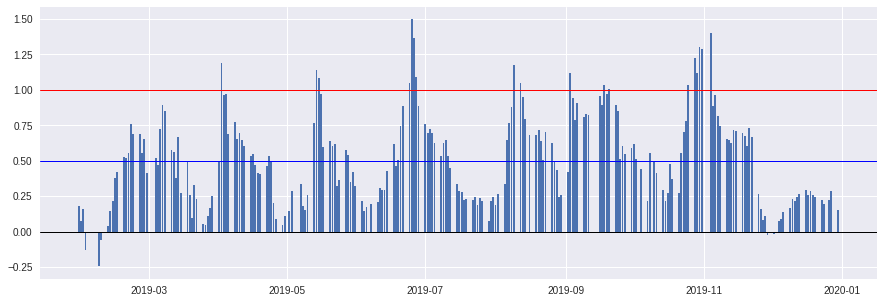

In [46]:
# 종가의 상대적인 위치를 시각화 : PercentB
# PercentB가 1 초과시 상위 밴드 초과
# PercentB가 0 미만시 하위 밴드 미만

# 그래프의 크기 가로 15 세로 5
plt.figure(figsize=(15, 5))
# PercentB를 막대 그래프로 출력
plt.bar(df.DT, df["PercentB"])
# 1 지점(UB) : 빨간색
plt.axhline(1, c="r", lw=1)
# 0.5 지점 : 파란색
plt.axhline(0.5, c="b", lw=1)
# 0 지점(LB) : 검은색
plt.axhline(0, c="k", lw=1)

In [47]:
# PercentB(%밴드)를 선 그래프로 상세하게 출력
fig = make_subplots(
    rows=1, cols=1,
    vertical_spacing=0.01,
    shared_xaxes=True,
    subplot_titles=('<b>%밴드 상세</b>')
)

# PercentB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['PercentB'],
        line = dict(color='black'),
        name='%밴드'
    ), row=1, col=1

)

# UB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['UB'],
        line = dict(color='red', dash='dash'),
        name='UpperB'
    ), row=1, col=1

)

# LB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['LB'],
        line = dict(color='blue', dash='dash'),
        name='LowerB'
    ), row=1, col=1
)

# 매수시점 표시
fig.add_trace(
    go.Scatter(
        x = ['2019-02-08'],
        y = [-0.0581281],
        mode = "markers+text",
        marker = dict(color = 'darkblue', size = 10, symbol = 6),
        text = ["02/08"],
        textfont = dict(size = 15),
        textposition = "top center",
        name='매수점'
    ), row = 1, col = 1
)

# 매도시점 표시
fig.add_trace(
    go.Scatter(
        x = ['2019-05-16'],
        y = [0.9730004],
        mode = "markers+text",
        marker = dict(color = 'darkred', size = 10, symbol = 5),
        text = ["05/16"],
        textfont = dict(size = 13),
        textposition = "bottom center",
        name='매도점'
    ), row = 1, col = 1
)

fig.update_layout(width = 1200, height = 800, xaxis_rangeslider_visible = True)

fig.show()

### **2. 바른손이앤에이**

In [48]:
# 실행할 SQL
# 2019년 1월 1일 ~ 2019년 12월 31일 바른손이앤에이의 종가 조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '035620'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-12-31'
"""  

In [49]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

246

In [50]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [51]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('1260.000'),
  'DT': datetime.date(2019, 1, 2),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1315.000'),
  'DT': datetime.date(2019, 1, 3),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1340.000'),
  'DT': datetime.date(2019, 1, 4),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1315.000'),
  'DT': datetime.date(2019, 1, 7),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1300.000'),
  'DT': datetime.date(2019, 1, 8),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1285.000'),
  'DT': datetime.date(2019, 1, 9),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1305.000'),
  'DT': datetime.date(2019, 1, 10),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1345.000'),
  'DT': datetime.date(2019, 1, 11),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1345.000'),
  'DT': datetime.date(2019, 1, 14),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1345.000'),
  'DT': datetime.date(2019, 1, 15),
  'STK_CD': '035620'},
 {'C_PRC': Decimal('1350.000'),
  'DT': datetime.date(2019, 1, 16),
  'STK_CD': '035620'},
 {'C_

In [52]:
# result를 데이터 프레임으로 변환
df = pd.DataFrame(result)

In [53]:
df

,STK_CD,DT,C_PRC
0,035620,2019-01-02,1260.000
1,035620,2019-01-03,1315.000
2,035620,2019-01-04,1340.000
3,035620,2019-01-07,1315.000
4,035620,2019-01-08,1300.000
5,035620,2019-01-09,1285.000
6,035620,2019-01-10,1305.000
7,035620,2019-01-11,1345.000
8,035620,2019-01-14,1345.000
9,035620,2019-01-15,1345.000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  246 non-null    object
 1   DT      246 non-null    object
 2   C_PRC   246 non-null    object
dtypes: object(3)
memory usage: 5.9+ KB


In [55]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [56]:
# C_PRC 컬럼의 타입을 정수로 변환
df.loc[: , "C_PRC" ] = df.loc[: , "C_PRC" ].astype(int)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  246 non-null    object        
 1   DT      246 non-null    datetime64[ns]
 2   C_PRC   246 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 5.9+ KB


In [58]:
df["C_PRC"].describe()

count     246.000000
mean     1651.768293
std       325.340361
min      1260.000000
25%      1445.000000
50%      1577.500000
75%      1800.000000
max      3230.000000
Name: C_PRC, dtype: float64

In [59]:
# 종가 분산
df["C_PRC"].var()

105846.350174216

In [60]:
# np.sqrt() : 루트 계산
# 분산에 루트를 계산하면 표준편차
# np.sqrt(df["C_PRC"].var())
# 분산에 0.5 승을 해도 표준편차
# df["C_PRC"].var() ** 0.5
# 다 같은 결과

# 종가의 표준편차
df["C_PRC"].std()

325.3403605060645

In [61]:
df

,STK_CD,DT,C_PRC
0,035620,2019-01-02,1260
1,035620,2019-01-03,1315
2,035620,2019-01-04,1340
3,035620,2019-01-07,1315
4,035620,2019-01-08,1300
5,035620,2019-01-09,1285
6,035620,2019-01-10,1305
7,035620,2019-01-11,1345
8,035620,2019-01-14,1345
9,035620,2019-01-15,1345


In [62]:
# 20일간의 종가 이동평균을 계산
df["MA20"] = df["C_PRC"].rolling(20).mean()
# 20일간의 종가 표준편차
df["stddev"] = df["C_PRC"].rolling(20).std()

# 상위 밴드(UpperB) / 하위 밴드(LowerB)
# UpperB = 종가의 이동평균 + (표준편차 * 2)
df["UpperB"] = df["MA20"] + (df["stddev"] * 2)
# LowerB = 종가의 이동평균 - (표준편차 * 2)
df["LowerB"] = df["MA20"] - (df["stddev"] * 2)

In [63]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB
0,035620,2019-01-02,1260,NaN,NaN,NaN,NaN
1,035620,2019-01-03,1315,NaN,NaN,NaN,NaN
2,035620,2019-01-04,1340,NaN,NaN,NaN,NaN
3,035620,2019-01-07,1315,NaN,NaN,NaN,NaN
4,035620,2019-01-08,1300,NaN,NaN,NaN,NaN
5,035620,2019-01-09,1285,NaN,NaN,NaN,NaN
6,035620,2019-01-10,1305,NaN,NaN,NaN,NaN
7,035620,2019-01-11,1345,NaN,NaN,NaN,NaN
8,035620,2019-01-14,1345,NaN,NaN,NaN,NaN
9,035620,2019-01-15,1345,NaN,NaN,NaN,NaN


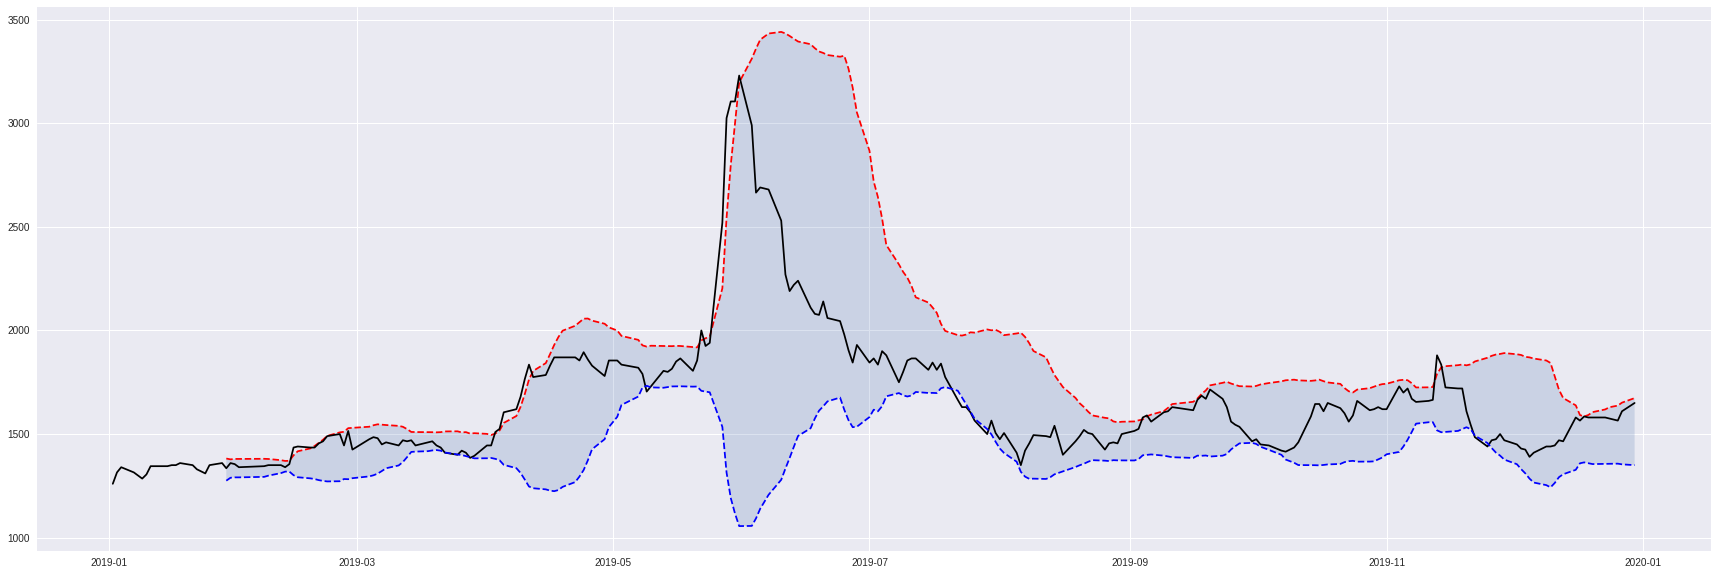

In [64]:
# pyplot을 통한 볼린저밴드를 시각화

# 그래프의 크기 가로 30 세로 10
plt.figure(figsize=(30, 10))
# 상위 밴드 : 빨간색
plt.plot(df.DT, df.UpperB, "r--")
# 종가의 이동평균 : 검은색
plt.plot(df.DT, df.C_PRC, "k")
# 하위 밴드 : 파란색
plt.plot(df.DT, df.LowerB, "b--")

# 각 날짜의 상위 밴드와 하위 밴드 사이에 색을 칠함
plt.fill_between(df.DT, df.LowerB, df.UpperB, alpha=0.2)

In [65]:
# PercentB : (종가 - 하위밴드) / (상위밴드 - 하위밴드)
df["PercentB"] = (df["C_PRC"] - df["LowerB"]) / (df["UpperB"] - df["LowerB"])
df['UB'] = 1.0
df['LB'] = 0.0

In [66]:
df

,STK_CD,DT,C_PRC,MA20,stddev,UpperB,LowerB,PercentB,UB,LB
0,035620,2019-01-02,1260,NaN,NaN,NaN,NaN,NaN,1.0,0.0
1,035620,2019-01-03,1315,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2,035620,2019-01-04,1340,NaN,NaN,NaN,NaN,NaN,1.0,0.0
3,035620,2019-01-07,1315,NaN,NaN,NaN,NaN,NaN,1.0,0.0
4,035620,2019-01-08,1300,NaN,NaN,NaN,NaN,NaN,1.0,0.0
5,035620,2019-01-09,1285,NaN,NaN,NaN,NaN,NaN,1.0,0.0
6,035620,2019-01-10,1305,NaN,NaN,NaN,NaN,NaN,1.0,0.0
7,035620,2019-01-11,1345,NaN,NaN,NaN,NaN,NaN,1.0,0.0
8,035620,2019-01-14,1345,NaN,NaN,NaN,NaN,NaN,1.0,0.0
9,035620,2019-01-15,1345,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [67]:
# 매수일 계산
def TimeToBuy(e):
  timing = 0
  if e['PercentB'] < 0:
    timing = 1
  return timing

In [68]:
df['time_to_buy'] = df[['PercentB']].apply(TimeToBuy, axis=1)

In [69]:
pd.set_option('display.max_rows', None)

In [70]:
pd.set_option('display.max_columns', None)

In [71]:
df['first_crashed'] = df['time_to_buy'].apply('diff')

In [72]:
idx = 0
idx_ls = []
fs_np = np.array(df['first_crashed'])

idx = np.where(fs_np == 1.0)
idx_ls.append(idx[0]+1)

In [73]:
idx

(array([ 53,  57,  85, 136, 220]),)

In [74]:
idx_ls

[array([ 54,  58,  86, 137, 221])]

In [75]:
purchase_date = []
for idx in idx_ls:
  purchase_date.append(df.iloc[idx]['DT'])

In [76]:
# 매수일 리스트
purchase_date
# 이후에 상세 그래프와 비교한다
# 그리하여, 이중에서 이틀 연속으로 PercentB가 0보다 작은 날을 정한 후, 다음날을 매수일로 확정

[54    2019-03-25
 58    2019-03-29
 86    2019-05-10
 137   2019-07-23
 221   2019-11-25
 Name: DT, dtype: datetime64[ns]]

In [77]:
# 매도일 계산
def TimeToSell(e): # e는 Ser
  timing = 0
  if e['PercentB'] > 1:
    timing = 1
  return timing

In [78]:
df['time_to_sell'] = df[['PercentB']].apply(TimeToSell, axis=1)

In [79]:
df['first_rasing'] = df['time_to_sell'].apply('diff')

In [80]:
idx = 0
idx_ls = []
fs_np = np.array(df['first_rasing'])

idx = np.where(fs_np == 1.0)
idx_ls.append(idx[0]+1)

In [81]:
idx

(array([ 28,  61,  94,  97, 167, 213, 238]),)

In [82]:
idx_ls

[array([ 29,  62,  95,  98, 168, 214, 239])]

In [83]:
sale_date = []
for idx in idx_ls:
  sale_date.append(df.iloc[idx]['DT'])

In [84]:
# 매도일 리스트
sale_date
# 이후에 상세 그래프와 비교한다
# 그리하여, 이중에서 이틀 연속으로 PercentB가 1보다 큰 날을 정한 후, 다음날을 매도일로 확정

[29    2019-02-15
 62    2019-04-04
 95    2019-05-23
 98    2019-05-28
 168   2019-09-05
 214   2019-11-14
 239   2019-12-19
 Name: DT, dtype: datetime64[ns]]

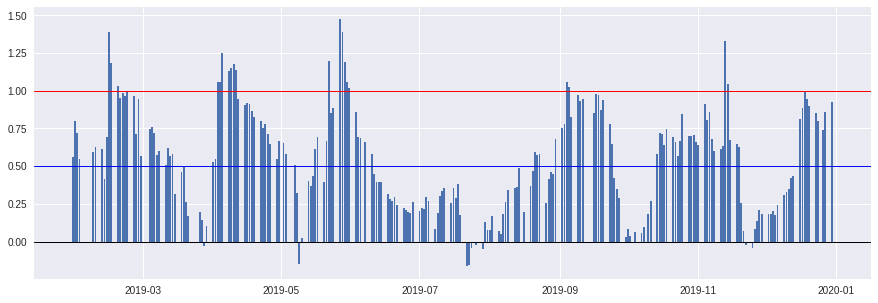

In [85]:
# 종가의 상대적인 위치를 시각화 : PercentB
# PercentB가 1 초과시 상위 밴드 초과
# PercentB가 0 미만시 하위 밴드 미만

# 그래프의 크기 가로 15 세로 5
plt.figure(figsize=(15, 5))
# PercentB를 막대 그래프로 출력
plt.bar(df.DT, df["PercentB"])
# 1 지점(UB) : 빨간색
plt.axhline(1, c="r", lw=1)
# 0.5 지점 : 파란색
plt.axhline(0.5, c="b", lw=1)
# 0 지점(LB) : 검은색
plt.axhline(0, c="k", lw=1)

In [86]:
# PercentB(%밴드)를 선 그래프로 상세하게 출력
fig = make_subplots(
    rows=1, cols=1,
    vertical_spacing=0.01,
    shared_xaxes=True,
    subplot_titles=('<b>%밴드 상세</b>')
)

# PercentB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['PercentB'],
        line = dict(color='black'),
        name='%밴드'
    ), row=1, col=1

)

# UB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['UB'],
        line = dict(color='red', dash='dash'),
        name='UpperB'
    ), row=1, col=1

)

# LB 표시
fig.add_trace(
    go.Scatter(
        x = df.DT,
        y = df['LB'],
        line = dict(color='blue', dash='dash'),
        name='LowerB'
    ), row=1, col=1
)

# 매수시점 표시
fig.add_trace(
    go.Scatter(
        x = ['2019-03-26', '2019-07-24'],
        y = [0.1955476, -0.04104955],
        mode = "markers+text",
        marker = dict(color = 'darkblue', size = 10, symbol = 6),
        text = ["03/26", "07/24"],
        textfont = dict(size = 15),
        textposition = "top center",
        name='매수점'
    ), row = 1, col = 1
)

# 매도시점 표시
fig.add_trace(
    go.Scatter(
        x = ['2019-04-05', '2019-09-06'],
        y = [1.253241, 0.8240421],
        mode = "markers+text",
        marker = dict(color = 'darkred', size = 10, symbol = 5),
        text = ["04/05", "09/06"],
        textfont = dict(size = 13),
        textposition = "bottom center",
        name='매도점'
    ), row = 1, col = 1
)

fig.update_layout(width = 1200, height = 800, xaxis_rangeslider_visible = True)

fig.show()